In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy as sp

In [2]:
env = pd.read_csv('2020-03-03_env.csv')
pct = pd.read_csv('2020-03-03_individual_temps_env_logger.csv')
plant_detection = pd.read_csv('plant_detections.csv')

In [ ]:
env['time'] = pd.to_datetime(env['time'])

In [ ]:
del env['Unnamed: 0']

In [16]:
## Gets values from the top of the hour from env file
env['minute'] = env.time.dt.minute
hour_only = env.loc[env['minute'] == 0]

In [17]:
ctd_el = (pct['atm_temp'] - pct['median'])
atm_var = (env['Env Temp'] - env['Azmet Temp'])
atm_var_hour = (hour_only['Env Temp'] - hour_only['Azmet Temp'])
wind_var_hour = (hour_only['Env Wind Speed'] - hour_only['Azmet Wind Speed'])

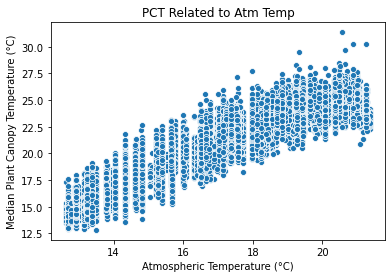

In [123]:
fig1 = sns.scatterplot(data = pct, x = "atm_temp_c", y = "median_c")
fig1.set(xlabel = 'Atmospheric Temperature (°C)', ylabel = 'Median Plant Canopy Temperature (°C)', title = 'PCT Related to Atm Temp');

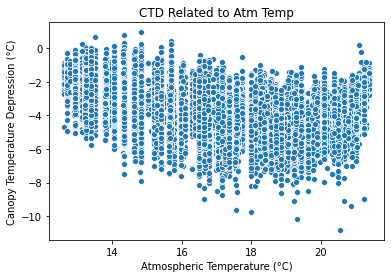

In [124]:
fig2 = sns.scatterplot(data = pct, x = "atm_temp_c", y = ctd_el)
fig2.set(xlabel = 'Atmospheric Temperature (°C)', ylabel = 'Canopy Temperature Depression (°C)', title = 'CTD Related to Atm Temp');

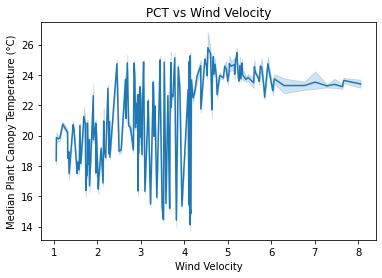

In [117]:
fig3 = sns.lineplot(data = pct, x = "wind_velocity", y = "median_c")
fig3.set(xlabel = 'Wind Velocity', ylabel = 'Median Plant Canopy Temperature (°C)', title = 'PCT vs Wind Velocity');
## High wind strips the boundary layer of the leaf, increasing transpiration rate which cools the plant (expect to see less variation
## at high wind velocity because the plant is no longer regulating the transpiration rate; not plant dependent anymore)

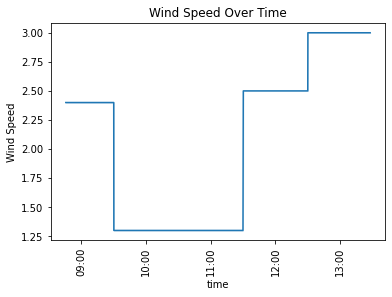

In [113]:
fig4 = sns.lineplot(data = env, x = "time", y = "Azmet Wind Speed")
fig4.set(xlabel = 'time', ylabel = 'Wind Speed', title = 'Wind Speed Over Time')
fig4.xaxis.set_major_locator(mdates.HourLocator(interval=1))
fig4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=90);

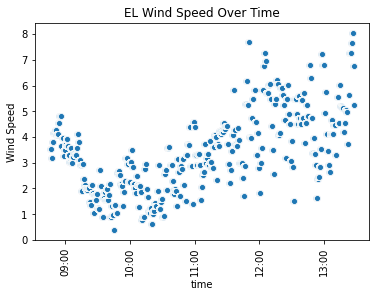

In [122]:
fig5 = sns.scatterplot(data = env, x = "time", y = "Env Wind Speed")
fig5.set(xlabel = 'time', ylabel = 'Wind Speed', title = 'EL Wind Speed Over Time')
fig5.xaxis.set_major_locator(mdates.HourLocator(interval=1))
fig5.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=90);

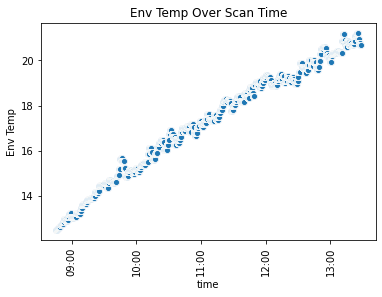

In [120]:
fig6 = sns.scatterplot(data = env, x = "time", y = "Env Temp")
fig6.set(xlabel = 'time', ylabel = 'Env Temp', title = 'Env Temp Over Scan Time')
fig6.xaxis.set_major_locator(mdates.HourLocator(interval=1))
fig6.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=90);

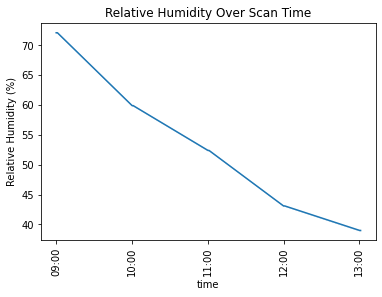

In [20]:
fig7 = sns.lineplot(data = hour_only, x = "time", y = "relative humidity")
fig7.set(xlabel = 'time', ylabel = 'Relative Humidity (%)', title = 'Relative Humidity Over Scan Time')
fig7.xaxis.set_major_locator(mdates.HourLocator(interval=1))
fig7.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=90);

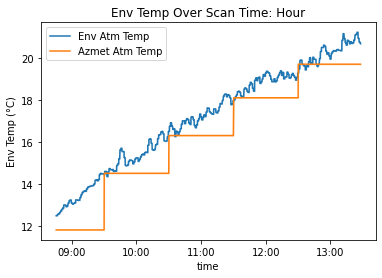

In [132]:
ax = sns.lineplot(x='time', y='Env Temp', data = env, label = 'Env Atm Temp')
sns.lineplot(x='time', y='Azmet Temp', data = env, label = 'Azmet Atm Temp')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set(xlabel = 'time', ylabel = 'Env Temp (°C)', title = 'Env Temp Over Scan Time: Hour');

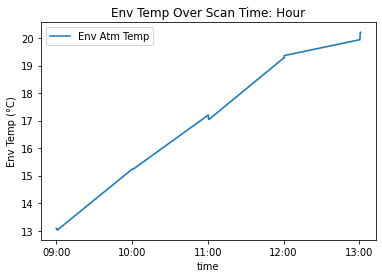

In [133]:
ax = sns.lineplot(x='time', y='Env Temp', data = hour_only, label = 'Env Atm Temp')
#sns.lineplot(x='time', y='Azmet Temp', data = hour_only, label = 'Azmet Atm Temp')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set(xlabel = 'time', ylabel = 'Env Temp (°C)', title = 'Env Temp Over Scan Time: Hour');

[Text(0.5, 0, 'time'),
 Text(0, 0.5, 'Wind Speed'),
 Text(0.5, 1.0, 'Wind Speed Over Scan Time: Hour')]

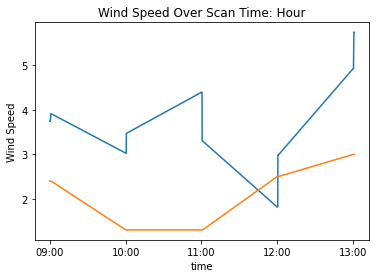

In [112]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
plt1 = plt.plot(hour_only['time'], hour_only['Env Wind Speed'])
plt2 = plt.plot(hour_only['time'], hour_only['Azmet Wind Speed'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set(xlabel = 'time', ylabel = 'Wind Speed', title = 'Wind Speed Over Scan Time: Hour')

[Text(0.5, 0, 'time'),
 Text(0, 0.5, 'Difference b/w EL and AZmet Temp'),
 Text(0.5, 1.0, 'Variance in Atm Temp Sensors: Hour')]

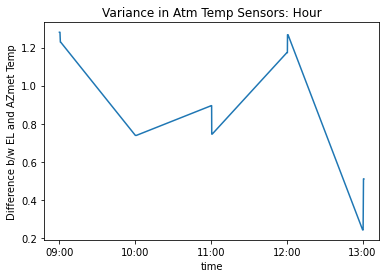

In [100]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
plt.plot(hour_only['time'], atm_var_hour)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set(xlabel = 'time', ylabel = 'Difference b/w EL and AZmet Temp', title = 'Variance in Atm Temp Sensors: Hour')

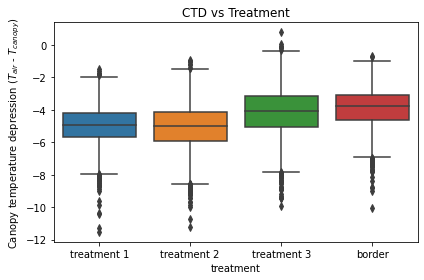

In [15]:
#sns.set_theme('paper')
#sns.set_style('darkgrid')
#sns.set_palette('colorblind')

sns.boxplot(x='treatment', y='norm_temp_c', data=plant_detection)
plt.ylabel('Canopy temperature depression ($T_{air}$ - $T_{canopy}$)')
plt.title('CTD vs Treatment')
plt.tight_layout()
plt.savefig('CTD vs Treatment.png', dpi = 300)

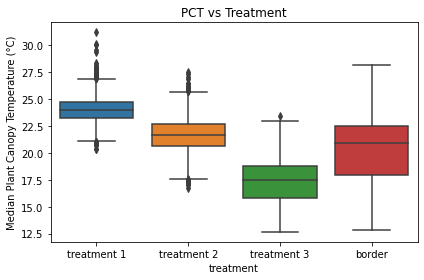

In [16]:
sns.boxplot(x='treatment', y='median_c', data=plant_detection)
plt.ylabel('Median Plant Canopy Temperature (°C)')
plt.title('PCT vs Treatment')
plt.tight_layout()
plt.savefig('PCT vs Treatment.png', dpi = 300)

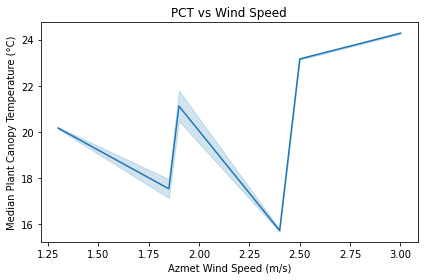

In [22]:
sns.lineplot(x='azmet wind velocity', y='median_c', data=plant_detection)
plt.xlabel('Azmet Wind Speed (m/s)')
plt.ylabel('Median Plant Canopy Temperature (°C)')
plt.title('PCT vs Wind Speed')
plt.tight_layout()
plt.savefig('PCT vs Wind.png', dpi = 300)

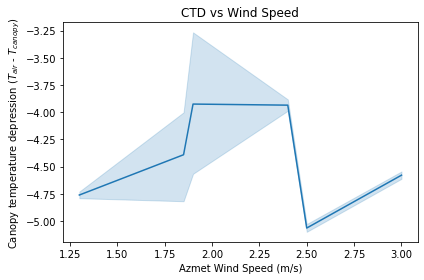

In [25]:
sns.lineplot(x='azmet wind velocity', y='norm_temp_c', data=plant_detection)
plt.xlabel('Azmet Wind Speed (m/s)')
plt.ylabel('Canopy temperature depression ($T_{air}$ - $T_{canopy}$)')
plt.title('CTD vs Wind Speed')
plt.tight_layout()
plt.savefig('CTD vs Wind.png', dpi = 300)

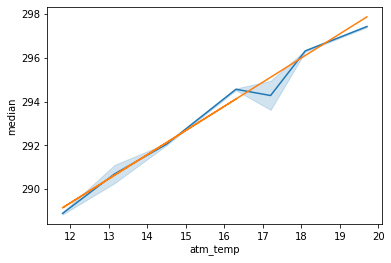

In [46]:
x=plant_detection['atm_temp']
y=plant_detection['median']
m, b = np.polyfit(x, y, 1)
sns.lineplot(x, y)
plt.plot(x, m*x + b)
#figure=smf.glm(formula="median ~ atm_temp", data = env, family = sm.families.Gaussian())
#res=figure.fit()
#res.summary()

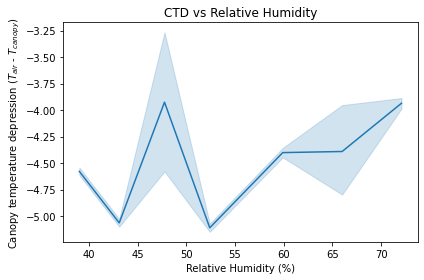

In [26]:
sns.lineplot(x='relative humidity', y='norm_temp_c', data=plant_detection)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Canopy temperature depression ($T_{air}$ - $T_{canopy}$)')
plt.title('CTD vs Relative Humidity')
plt.tight_layout()
plt.savefig('CTD vs Relative_humidity.png', dpi = 300)

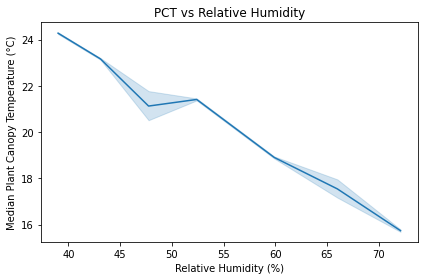

In [24]:
sns.lineplot(x='relative humidity', y='median_c', data=plant_detection)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Median Plant Canopy Temperature (°C)')
plt.title('PCT vs Relative Humidity')
plt.tight_layout()
plt.savefig('PCT vs Relative_humidity.png', dpi = 300)